In [1]:

import torch
from torch.nn.parameter import Parameter # import parameter class

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


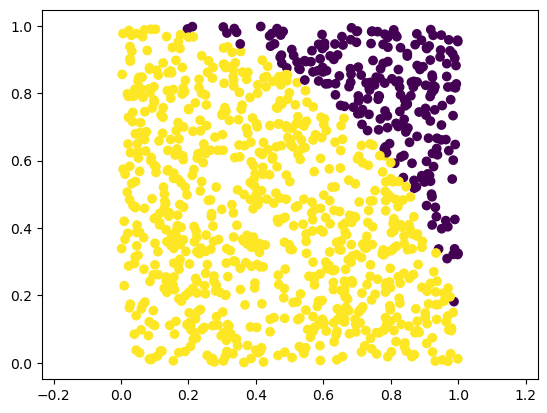

In [2]:
# Same from previous...
x = torch.rand([1000,2])
x_in_circle = ((x**2).sum(1) < 1)

def accuracy(pred_label):
    return (pred_label==x_in_circle).float().mean()

def show(pred_label):
    scatter(*x.numpy().T, c=pred_label.numpy())
    axis('equal')

def loss(prediction):
    return -(x_in_circle.float()     * prediction.log() +
             (1-x_in_circle.float()) * (1-prediction).log() ).mean()

show(x_in_circle)

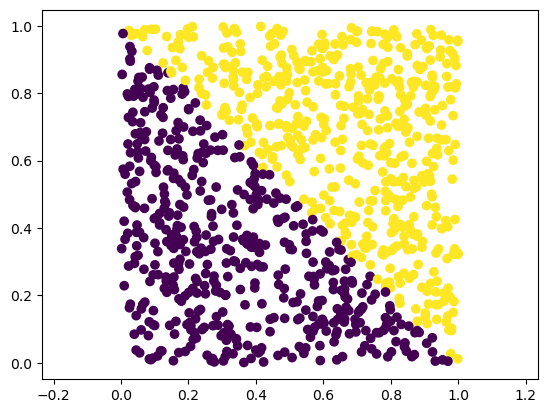

In [3]:
# To define a computation graph in pytorch, need to define it as a class
class Linear(torch.nn.Module): # torch.nn deals with neural networks, module is construct that stores full or partial computational graph
    def __init__(self, input_dim):
        super().__init__() # must call init of super class
        self.w = Parameter(torch.ones(input_dim)) # add weight parameters
        self.b = Parameter(-torch.ones(1)) # add bias parameter (-1s)
    
    def forward(self, x): # forward function does all the computation of the computation graph you're modeling
        return (x * self.w[None,:]).sum(dim=1) + self.b # matrix multiplication between x and the weights, and add bias

class LinearClassifier(torch.nn.Module): # Linear classifier, defined as a torch module
    def __init__(self, input_dim):
        super().__init__()
        self.linear = Linear(input_dim) # use linear function as the sub-module of our linear classifier
    
    def forward(self, x):
        logit = self.linear(x) # compute output of linear function
        return 1/(1+(-logit).exp()) # feed this through a sigmoid


classifier = LinearClassifier(2) # creates a linear classifier, input dimension of 2 (x and y component of point), outputs a value between 0 and 1 corresponding to prob. of the classifier
# of the point being inside the circle or outside the circle

show(classifier(x).detach() > 0.5) # call it with input x (random numbers previously generated), call detach to take output of classifier and detach from the computation graph
# threshold of 0.5 which wil lgive us a binary visualization of a point lying inside or outside of the circle

In [4]:
# Look at parameters of the classifier
# returns list of all the parameters your classifier is using
# first set is the weights, second set is the bias
# use this later on to run gradient descent
list(classifier.parameters())

[Parameter containing:
 tensor([1., 1.], requires_grad=True),
 Parameter containing:
 tensor([-1.], requires_grad=True)]